In [1]:
import math
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Caso No.2

In [2]:
data = pd.read_csv("./data.csv")

In [3]:
data.shape

(569, 33)

In [4]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [5]:
data.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [57]:
filtered_data = data[(data['smoothness_mean'] <= 1800 ) & (data['perimeter_mean'] <= 130) & (data['perimeter_mean'] >= 50)&(data['area_mean'] >= 160)]

In [58]:
filtered_data.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.140000e+02,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,...,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,514.000000,0.0
mean,2.676980e+07,0.313230,13.435424,18.952315,87.155545,578.556809,0.095767,0.098253,0.076159,0.041844,...,25.295603,100.733463,761.214786,0.131817,0.243106,0.251068,0.105611,0.288500,0.083757,NaN
std,1.128533e+08,0.464259,2.629666,4.213948,17.972025,234.571653,0.013902,0.047549,0.065932,0.030428,...,6.084160,25.412244,388.883547,0.023187,0.152602,0.197899,0.058962,0.060925,0.018258,NaN
min,8.670000e+03,0.000000,8.196000,9.710000,51.710000,201.900000,0.062510,0.019380,0.000000,0.000000,...,12.020000,56.650000,240.100000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.689030e+05,0.000000,11.600000,15.925000,74.332500,409.250000,0.085288,0.062233,0.027105,0.019467,...,20.752500,83.307500,506.450000,0.114725,0.139025,0.105625,0.062735,0.247900,0.071155,NaN
50%,9.056830e+05,0.000000,13.040000,18.575000,84.155000,522.000000,0.095045,0.086015,0.053800,0.030690,...,25.010000,95.185000,639.200000,0.131150,0.203400,0.195150,0.092040,0.280650,0.079505,NaN
75%,8.812838e+06,1.000000,14.950000,21.452500,97.365000,684.875000,0.104475,0.124675,0.110300,0.061268,...,29.105000,114.050000,896.975000,0.145075,0.314350,0.352675,0.147550,0.317275,0.091838,NaN
max,9.113205e+08,1.000000,19.810000,39.280000,130.000000,1260.000000,0.163400,0.311400,0.410800,0.147100,...,49.540000,186.800000,2477.000000,0.222600,1.058000,1.252000,0.270100,0.663800,0.207500,NaN


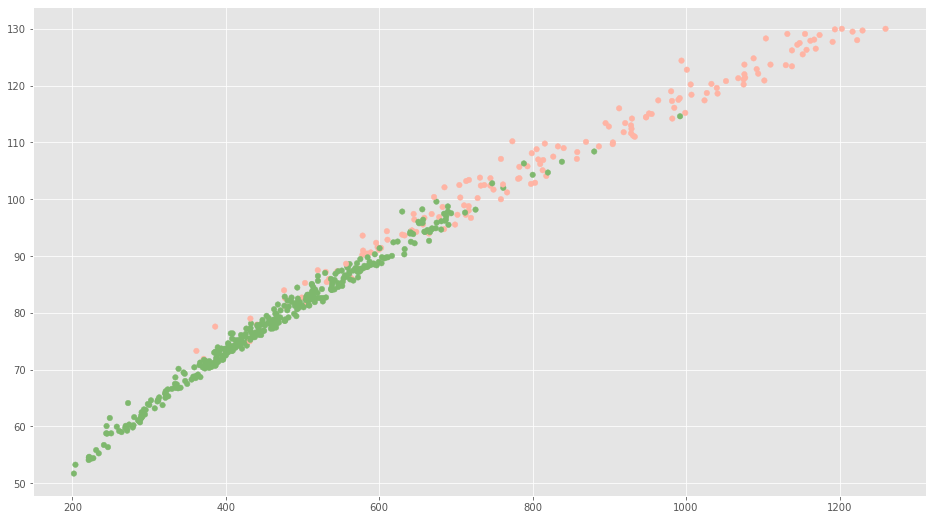

In [62]:
colores=['#FFB4A4','#7EB86D']
tamanios=[30,60]
 
f1 = filtered_data['area_mean'].values
f2 = filtered_data['perimeter_mean'].values
 
# Diferenciar si el tumor es Benigno o Maligno
asignar=[]
for index, row in filtered_data.iterrows():
    if(row['diagnosis']==1):
        asignar.append(colores[0])
    else:
        asignar.append(colores[1])
    
plt.scatter(f1, f2, c=asignar, s=tamanios[0])
plt.show()

In [60]:
dataX =filtered_data[["area_mean"]]
X_train = np.array(dataX)
y_train = filtered_data['perimeter_mean'].values
 
# Creamos el objeto de Regresión Linear
regr = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr.fit(X_train, y_train)
y_pred = regr.predict(X_train)

print('Coeficiente: ', regr.coef_)
print('valor donde corta el eje Y (en X=0): ', regr.intercept_)
print("Error medio cuadrado: %.2f" % mean_squared_error(y_train, y_pred))
print('Puntaje de Varianza: %.2f' % r2_score(y_train, y_pred))

Coeficiente:  [0.07586808]
valor donde corta el eje Y (en X=0):  43.261551514920036
Error medio cuadrado: 6.27
Puntaje de Varianza: 0.98


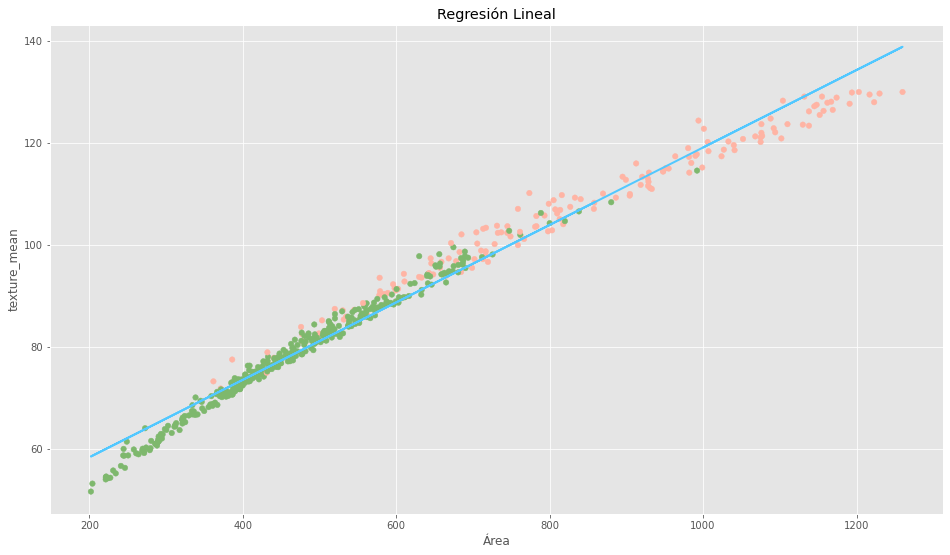

In [63]:
plt.scatter(X_train[:,0], y_train,  c=asignar, s=tamanios[0])
plt.plot(X_train[:,0], y_pred, color='#52C8FF', linewidth=2)

plt.xlabel('Área')
plt.ylabel('texture_mean')
plt.title('Regresión Lineal')

plt.show()

# Caso No.1

In [86]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

In [74]:
dataset = datasets.load_boston()

/Users/abrilpalencia/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the Californ

In [98]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])


In [99]:
print(dataset.feature_names)
print(dataset.DESCR)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial hig

In [100]:
x = dataset.data[:, np.newaxis, 5]
y = dataset.target

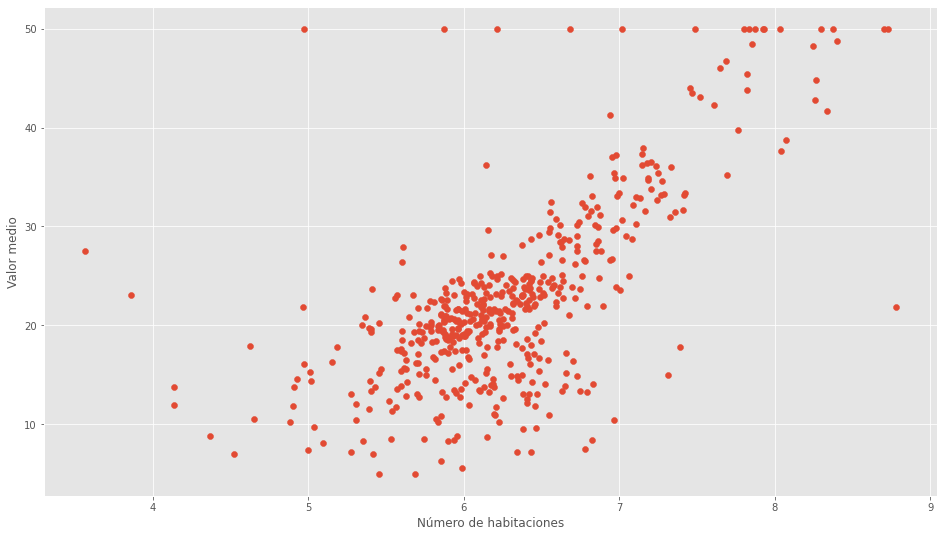

In [101]:
plt.scatter(x,y)
plt.xlabel ("Número de habitaciones")
plt. ylabel ("Valor medio")
plt. show ()

In [114]:
X_train, X_test, y_train, y_test= train_test_split (x, y, test_size=0.5)
lr = linear_model.LinearRegression()
lr.fit (X_train, y_train)
Y_pred = lr.predict (X_test)

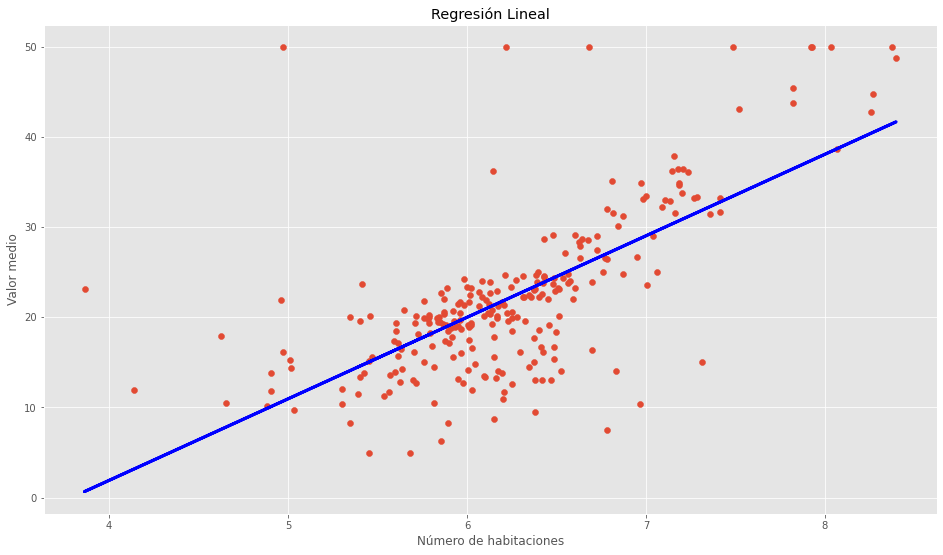

In [117]:
plt.scatter(X_test, y_test)
plt.plot (X_test,Y_pred, color='blue', linewidth=3)
plt.title ('Regresión Lineal')
plt.xlabel ('Número de habitaciones')
plt.ylabel("Valor medio")
plt.show ()

In [116]:
print('Coeficiente: ', lr.coef_)
print('valor donde corta el eje Y (en X=0): ', lr.intercept_)
print("Error medio cuadrado: ", mean_squared_error(X_train, y_train))
print('Puntaje de Varianza:', lr.score(X_train, y_train))

Coeficiente:  [9.04200285]
valor donde corta el eje Y (en X=0):  -34.252438682975956
Error medio cuadrado:  353.10091416205535
Puntaje de Varianza: 0.47667422928407244


# Caso No.3

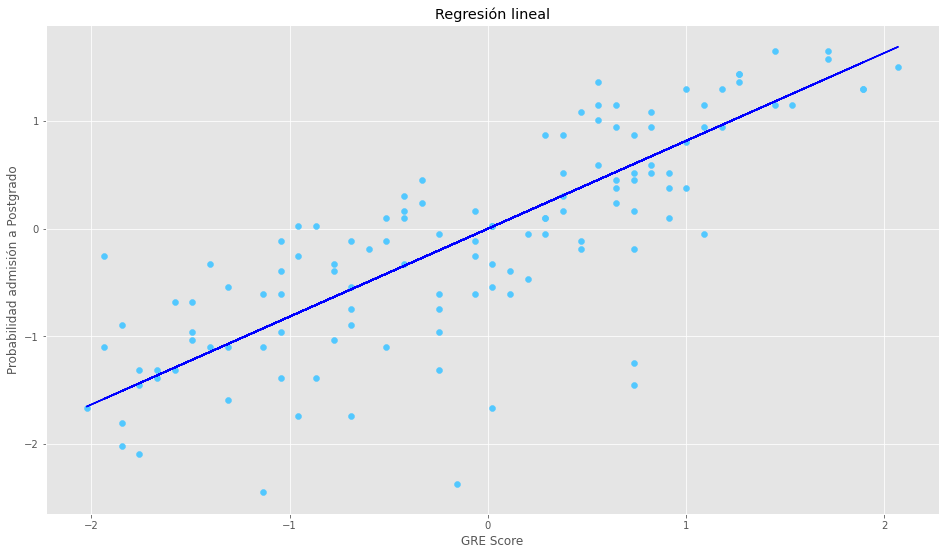

In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importar el dataset de entranamiento
dataset = pd.read_csv('./Admission_Predict_Ver1.1.csv')
X = dataset.iloc[:len(dataset), 1].values
X = X.reshape(-1,1)
X = np.insert(X, 0, 1, axis = 1)
y = dataset.iloc[:len(dataset), -1].values.reshape(-1,1)

# Seleccionar conjunto de training y test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

# Escalado de las variables
from sklearn.preprocessing import StandardScaler
st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)
st_y = StandardScaler()
y_train = st_y.fit_transform(y_train).reshape(-1)
y_test = st_y.transform(y_test).reshape(-1)


# Aplicación del modelo con librería de sklearn
from sklearn.linear_model import LinearRegression
regression_py = LinearRegression() 
regression_py.fit(X_train, y_train)
y_predict_py = regression_py.predict(X_test) 

# Gráfica de regresión conjunto de test
plt.scatter(X_test[:,1], y_test, color = "#52C8FF") 
plt.plot(X_test[:,1], y_predict_py, color = "blue")
plt.title("Regresión lineal")
plt.xlabel("GRE Score")
plt.ylabel("Probabilidad admisión a Postgrado")
plt.show()

In [129]:
print('Coeficiente: ', regression_py.coef_)
print('valor donde corta el eje Y (en X=0): ', regression_py.intercept_)

Coeficiente:  [0.         0.81604973]
valor donde corta el eje Y (en X=0):  1.4693270079485153e-15
